<a href="https://colab.research.google.com/github/lmassaron/ml4dummies_3ed/blob/main/ML4D3E_14_tackling_complexity_with_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

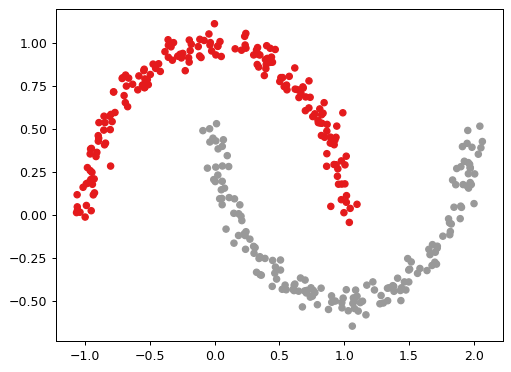

In [1]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

np.random.seed(0)
coord, cl = make_moons(500, noise=0.05)
X, Xt, y, yt = train_test_split(coord, cl,
                                test_size=0.30,
                                random_state=0)
cmap_set1 = plt.cm.Set1
fig, ax = plt.subplots(dpi=90)
ax.scatter(X[:,0], X[:,1], s=25, c=y, cmap=cmap_set1)
plt.show()

In [2]:
import os
os.environ["KERAS_BACKEND"] = "jax"

In [3]:
import keras

model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(2,)))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105 (420.00 B)

 Trainable params: 105 (420.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(X, y, epochs=1000, batch_size=64,
                    shuffle=True, verbose=0)

In [5]:
fitted_acc = history.history['accuracy'][-1]
print(f"Final training accuracy: {fitted_acc:0.3f}")

Final training accuracy: 0.997


In [6]:
from sklearn.metrics import accuracy_score

predictions = (model.predict(Xt)>=0.5).astype(int)
test_accuracy = accuracy_score(yt, predictions)
print(f"Accuracy on test set: {test_accuracy:0.3f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step
Accuracy on test set: 1.000


In [7]:
x_min, x_max = coord[:,0].min(), coord[:,0].max()
y_min, y_max = coord[:,1].min(), coord[:,1].max()

x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)

xx, yy = np.meshgrid(x_range, y_range)
xy = np.stack([np.ravel(xx), np.ravel(yy)], axis=1)
zz = model.predict(xy)
zz = zz.reshape(xx.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


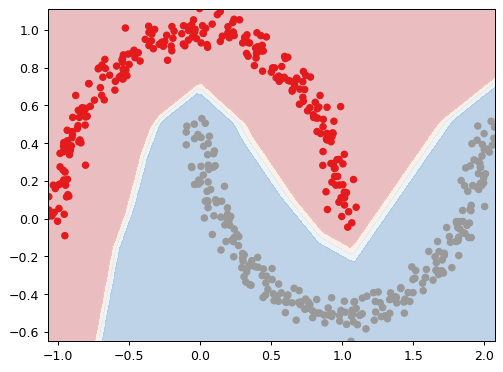

In [8]:
cmap_rb = plt.get_cmap('RdBu')
fig, ax = plt.subplots(dpi=90)
ax.contourf(xx, yy, zz, cmap=cmap_rb,
            alpha=0.3, levels=3)
ax.scatter(coord[:,0], coord[:,1],
           s=25, c=cl, cmap=cmap_set1)
plt.show()

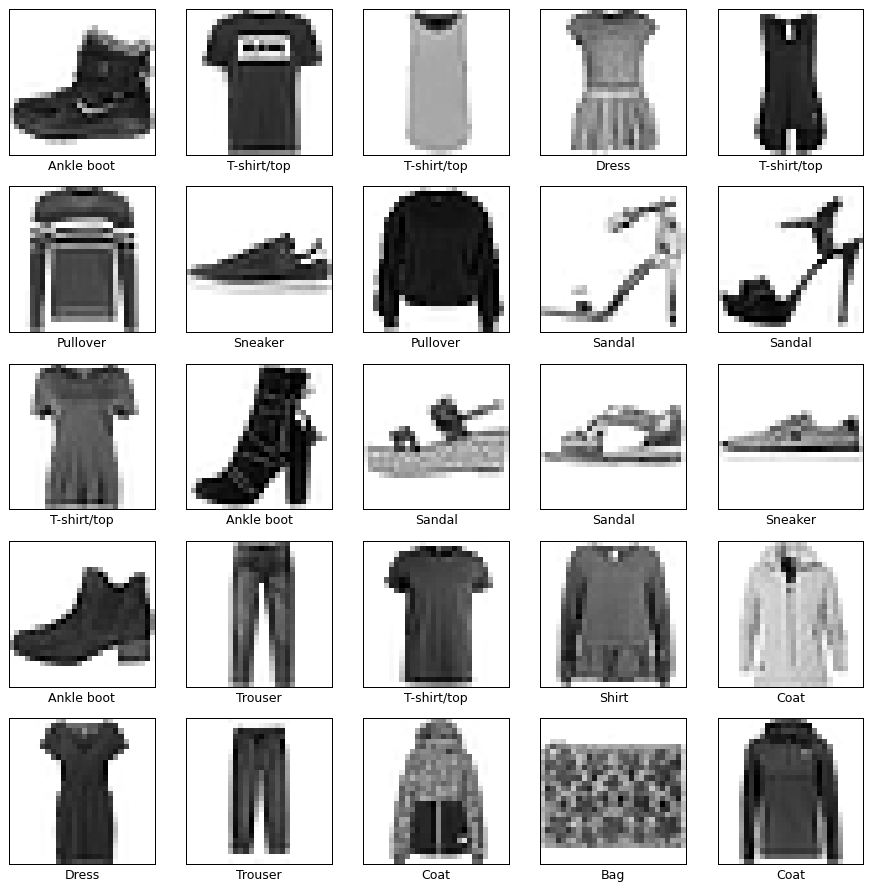

In [9]:
import keras
import matplotlib.pyplot as plt

loader = keras.datasets.fashion_mnist.load_data
(x_train, y_train), (x_test, y_test) = loader()

class_names = {
    0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover',
    3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt',
    7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

fig, axes = plt.subplots(5, 5, figsize=(10, 10), dpi=90)
for i in range(25):
    ax = axes[i // 5, i % 5]
    ax.imshow(x_train[i], cmap=plt.cm.binary)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(class_names[y_train[i]])
    ax.grid(False)

plt.tight_layout()
plt.show()

In [10]:
num_classes = 10
x_train = (x_train / 255.).reshape(-1, 28, 28, 1)
x_test = (x_test / 255.).reshape(-1, 28, 28, 1)

In [11]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num_classes, activation='softmax')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │       294,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 314,090 (1.20 MB)

 Trainable params: 314,090 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.fit(x_train, y_train,
          batch_size=64,
          epochs=11,
          verbose=1,
          validation_split=0.2)

score = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy on test set: {score[1]:.3f}")

Epoch 1/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7430 - loss: 0.7245 - val_accuracy: 0.8790 - val_loss: 0.3367
Epoch 2/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8729 - loss: 0.3608 - val_accuracy: 0.9001 - val_loss: 0.2792
Epoch 3/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8940 - loss: 0.3036 - val_accuracy: 0.8995 - val_loss: 0.2662
Epoch 4/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9019 - loss: 0.2675 - val_accuracy: 0.9094 - val_loss: 0.2432
Epoch 5/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9132 - loss: 0.2403 - val_accuracy: 0.8992 - val_loss: 0.2693
Epoch 6/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9222 - loss: 0.2172 - val_accuracy: 0.9137 - val_loss: 0.2342
Epoch 7/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9276 - loss: 0.1925 - val_accuracy: 0.9124 - val_loss: 0.2413
Epoch 8/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9340 - loss: 0.1770 - val_accuracy: 0.

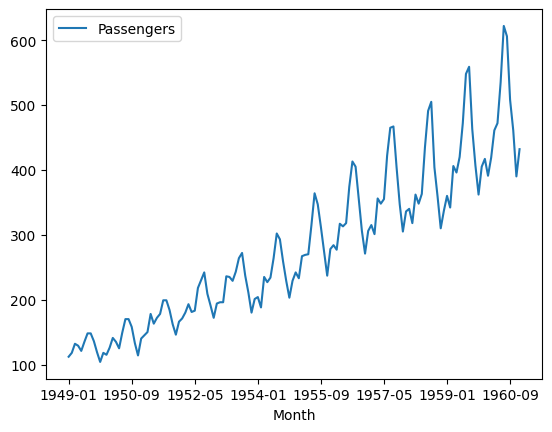

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

repository = (
    "https://github.com/lmassaron/ml4dummies_3ed/")
release = "releases/download/v1.0/"
filename = repository + release + "air_passengers.csv"
passengers = pd.read_csv(filename)
passengers = passengers.set_index("Month")

passengers.plot()
plt.show()

In [14]:
lookback = 12
sequence = pd.DataFrame(
    {"shift_" + str(s): passengers["Passengers"].shift(s)
     for s in range(lookback + 1)}
)[lookback:]

In [15]:
y = sequence.iloc[:, 0]
X = sequence.iloc[:, 1:]

max_value = np.max(y)
y /= max_value
X /= max_value

X = X.values.reshape((X.shape[0], X.shape[1], 1))

In [16]:
y_train = y[:-24]
y_test = y[-24:]

X_train = X[:-24]
X_test = X[-24:]

In [17]:
import keras

seed = 0
keras.utils.set_random_seed(seed)

model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(lookback, 1)))
model.add(keras.layers.LSTM(units=4))
model.add(keras.layers.Dense(4, activation="relu"))
model.add(keras.layers.Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 4)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(X_train, y_train,
                    epochs=300,
                    batch_size=8,
                    shuffle=False,
                    verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
RMSE for test set: 30.498


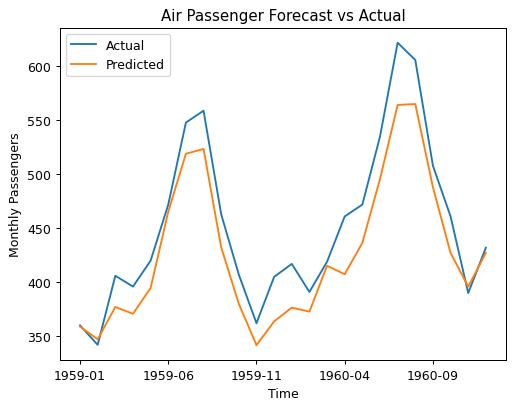

In [19]:
from sklearn.metrics import mean_squared_error

preds = model.predict(X_test) * max_value
real = y_test * max_value

rmse = np.sqrt(mean_squared_error(y_true=real, y_pred=preds))
print(f"RMSE for test set: {rmse:0.3f}")

fig, ax = plt.subplots(dpi=90)
real.plot(label="Actual", ax=ax)
ax.plot(preds, label="Predicted")
ax.set_title("Air Passenger Forecast vs Actual")
ax.set_ylabel("Monthly Passengers")
ax.set_xlabel("Time")
ax.legend()
plt.show()